In [1]:
from error_routines import *
import numpy as np

In [2]:

resolution = 30 #Angstrom
upper      = 10500
lower      = 3000
interval   = (upper - lower)/resolution


lam        =     np.linspace(lower, upper, interval)



/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [3]:
i = "/home/sam/Dropbox (Weizmann Institute)/superfit/sedm_sample/spectra/ZTF18abrzbum_20180922_P60_v1.ascii"
#i = "/home/sam/Dropbox (Weizmann Institute)/superfit/sedm_sample/spectra/ZTF18abjgyyr_20180801_P60_v2.ascii"
spec_object = np.loadtxt(i)

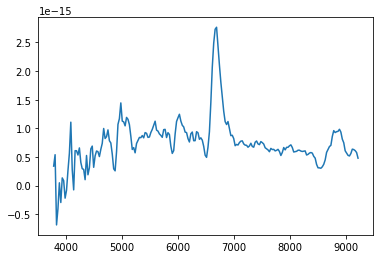

In [4]:
plt.plot(spec_object[:,0], spec_object[:,1])


In [5]:

int_obj = interpolate.interp1d(spec_object[:,0], spec_object[:,1],   bounds_error=False, fill_value='nan')

int_obj = int_obj(lam)

#For the SG filter 

mean_obj = np.mean(spec_object[:,1])


In [6]:
lin = linear_error(spec_object)

object_err_interp =  interpolate.interp1d(lin[:,0],  lin[:,1],  bounds_error=False, fill_value='nan')
                       
sigma_lin             =  object_err_interp(lam)
    

In [7]:
color='#0d1352'
edgecolor='#7e85cc'
facecolor='#a7abdb'

In [8]:
int_obj_mean = int_obj/mean_obj
sigma_lin_mean = sigma_lin/mean_obj


<IPython.core.display.Javascript object>


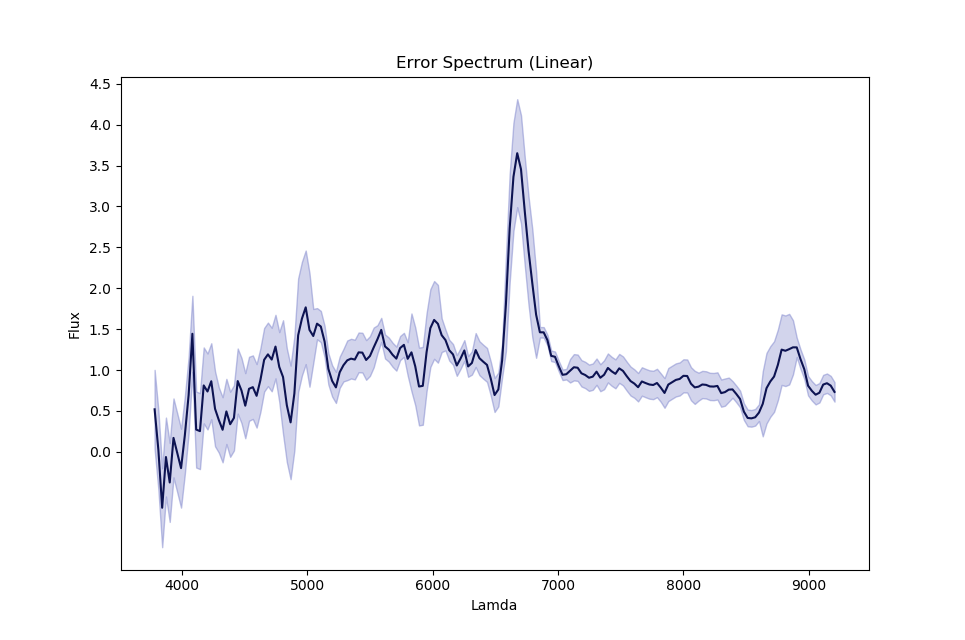

In [16]:
%matplotlib notebook

plt.title('Error Spectrum (Linear)')
plt.ylabel('Flux', labelpad=5)
plt.yticks(np.arange(0, 5, step=0.5))
plt.xlabel('Lamda')

        

    
plt.plot(lam, int_obj_mean, 'k', color=color)
plt.fill_between(lam, int_obj_mean-sigma_lin_mean, int_obj_mean + sigma_lin_mean,
    alpha=0.5, edgecolor=edgecolor, facecolor=facecolor)

In [10]:
sg = savitzky_golay(spec_object)


object_err_interp =  interpolate.interp1d(sg[:,0],  sg[:,1],  bounds_error=False, fill_value='nan')


sigma_sg             =  object_err_interp(lam)
    


<IPython.core.display.Javascript object>


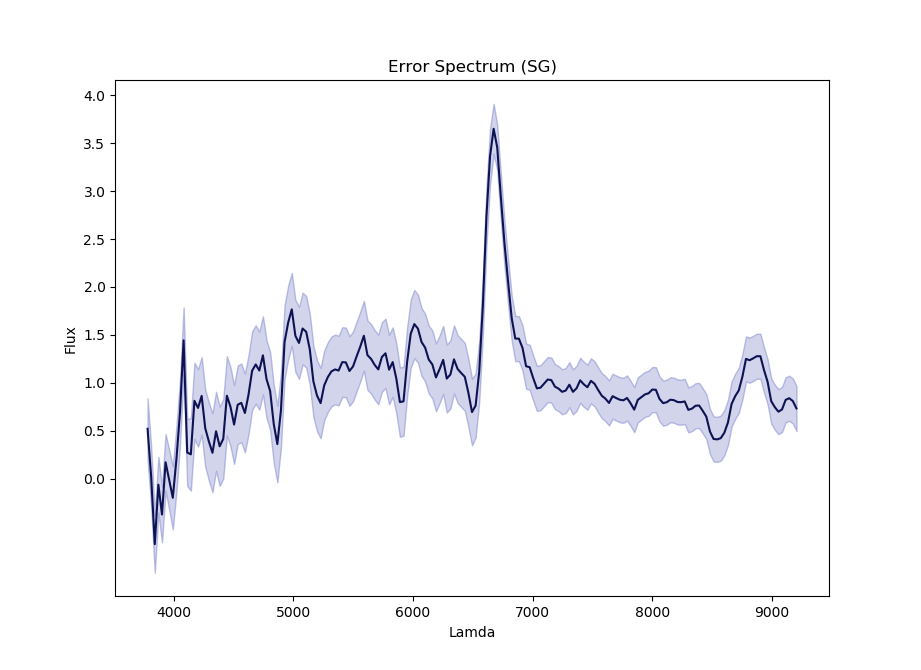

In [17]:
%matplotlib notebook


plt.title('Error Spectrum (SG)')
plt.ylabel('Flux')
plt.yticks(np.arange(0, 5, step=0.5))

plt.xlabel('Lamda')
        
plt.plot(lam, int_obj_mean, 'k', color=color)
plt.fill_between(lam, int_obj_mean - sigma_sg, int_obj_mean + sigma_sg,
    alpha=0.5, edgecolor=edgecolor, facecolor=facecolor)


# Redshift comparison

In [12]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
pySF_z =  np.array([0.09,
0.05,
0.03,
0.08,
0.05,
0.02,
0.02,
0.06,
0.03,
0.02,
0.05,
0,
0.02,
0.02,
0.01,
0.01,
0.04,
0.03,
0,
0.02])


In [14]:
z_true = np.array([0.09,
0.0358,
0.0324,
0.08,
0.0527,
0.01814,
0.020457,
0.04797,
0.031065,
0.024,
0.038034,
0.0095,
0.03,
0.023522,
0.0148,
0.003319,
0.04,
0.046,
0.0163,
0.02385])

<IPython.core.display.Javascript object>


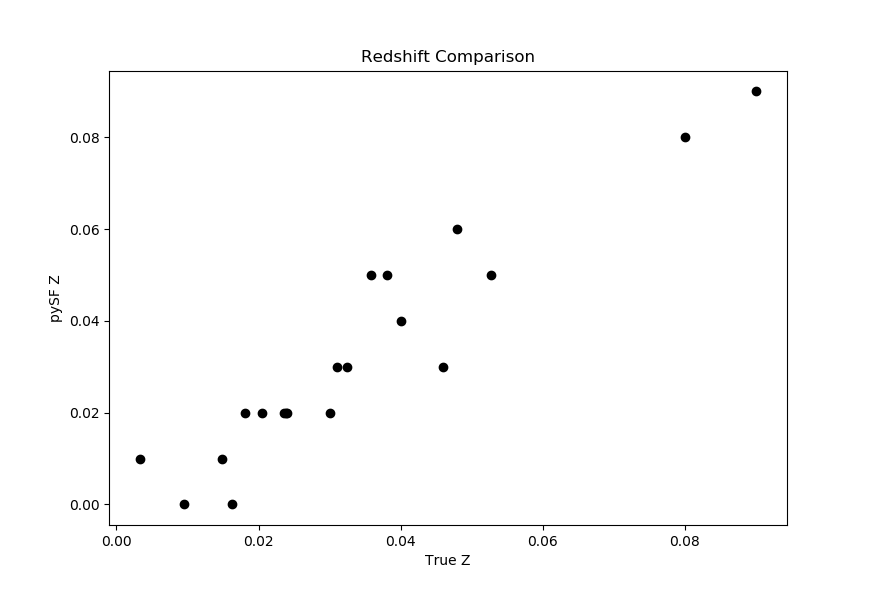

In [18]:
%matplotlib notebook
plt.title('Redshift Comparison')
plt.ylabel('pySF Z')
#plt.yticks(np.arange(0, 5, step=0.5))

plt.xlabel('True Z')
        
plt.plot(z_true, pySF_z, 'ko',)
plt.show()